In [6]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [7]:
dataset_name = 'cardiotocography2'
shapes = {
    'S': (17,12,8),
    'V2': (9,),
    'V3': (7,),
    'V4': (6,),
    'V5': (5,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([21], [3])


### S(X,X,X)

Average elapsed k-fold validation time: 110.84333 sec
Last measures: [0.173224538564682, 0.08692483603954315, 0.009794089011847973, 0.0637684166431427, 0.0589599683880806, 0.1766299605369568, 0.2934359014034271, 0.014500419609248638, 0.3235868811607361, 0.06856817752122879, 0.14077436923980713, 0.2891290783882141, 0.01128656230866909, 0.3185747265815735, 0.056090082973241806, 0.1720781773328781, 0.14474788308143616, 0.33098819851875305, 0.06587023288011551, 0.10869937390089035, 0.17235153913497925, 0.09513665735721588, 0.33085837960243225, 0.33082741498947144, 0.11289095878601074, 0.1793225109577179, 0.1500442773103714, 0.01169627159833908, 0.3265966773033142, 0.11563999950885773]
Loss history average: [0.30359433 0.2449462  0.21258004 0.21062921 0.20805795 0.19982987
 0.19039508 0.18722254 0.18430585 0.18176091 0.17940353 0.1773245
 0.17541382 0.17379756 0.16987382 0.16346028 0.16176226 0.1602326
 0.15881899 0.15752394 0.15652827 0.15566852 0.15493122 0.1542501
 0.1536509  0.15310292 

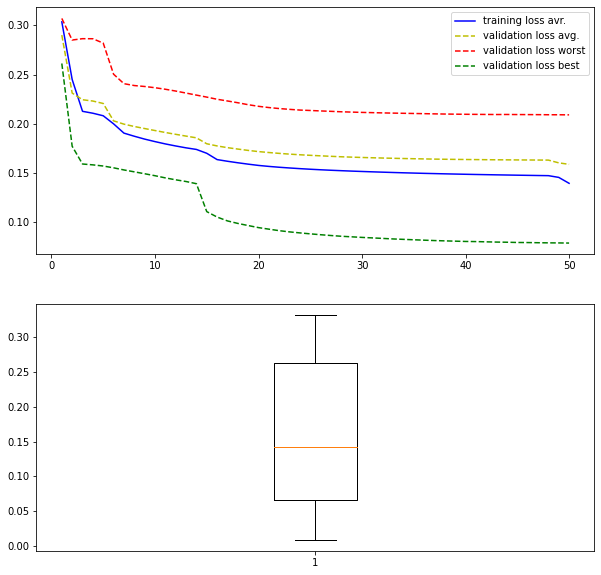

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 149.64481 sec
Last measures: [0.1517258733510971, 0.09500406682491302, 0.3333333134651184, 0.05557955056428909, 0.10125665366649628, 0.27494996786117554, 0.09007169306278229, 0.01960991881787777, 0.3162115812301636, 0.05462658032774925, 0.3171001970767975, 0.10991382598876953, 0.33480244874954224, 0.06568225473165512, 0.05744433403015137, 0.333333283662796, 0.16271062195301056, 0.3330560624599457, 0.06367585808038712, 0.28621363639831543, 0.10617111623287201, 0.14940573275089264, 0.33306220173835754, 0.32732439041137695, 0.08692202717065811, 0.09931138157844543, 0.13478974997997284, 0.33302411437034607, 0.3233714699745178, 0.10198851674795151]
Loss history average: [0.30615012 0.28272451 0.25335313 0.2242351  0.20941425 0.20556294
 0.20449303 0.20373237 0.20282099 0.20172934 0.2004158  0.19888039
 0.1971526  0.19532581 0.19349906 0.19171263 0.19004795 0.18854499
 0.18718887 0.18603478 0.18494877 0.18398251 0.18311748 0.18233046
 0.18162112 0.1809

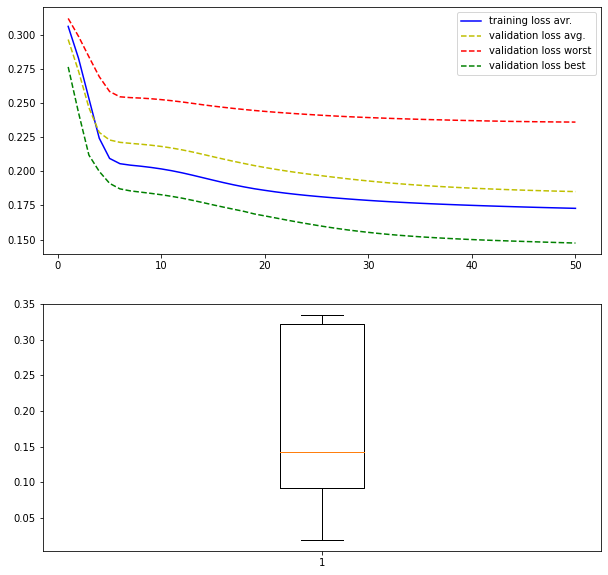

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 179.86672 sec
Last measures: [0.31670239567756653, 0.12101581692695618, 0.038344889879226685, 0.3150854706764221, 0.08207662403583527, 0.3305889964103699, 0.11572205275297165, 0.02594366855919361, 0.061747416853904724, 0.11201337724924088, 0.14578771591186523, 0.14061890542507172, 0.027014778926968575, 0.05783562734723091, 0.09503372013568878, 0.15572825074195862, 0.10633768141269684, 0.02813701331615448, 0.0611506849527359, 0.07585237175226212, 0.16862408816814423, 0.09664736688137054, 0.034443579614162445, 0.317586749792099, 0.10137879848480225, 0.12248093634843826, 0.3333333134651184, 0.026891635730862617, 0.05136726796627045, 0.11682650446891785]
Loss history average: [0.31077622 0.28665221 0.25341552 0.21826528 0.20001999 0.19446942
 0.19295692 0.19221564 0.19096133 0.18579646 0.18436865 0.1834742
 0.17927337 0.17452592 0.17322695 0.17202092 0.16943625 0.16267287
 0.15625209 0.15199921 0.14631696 0.14411575 0.14263871 0.14118501
 0.1397628  

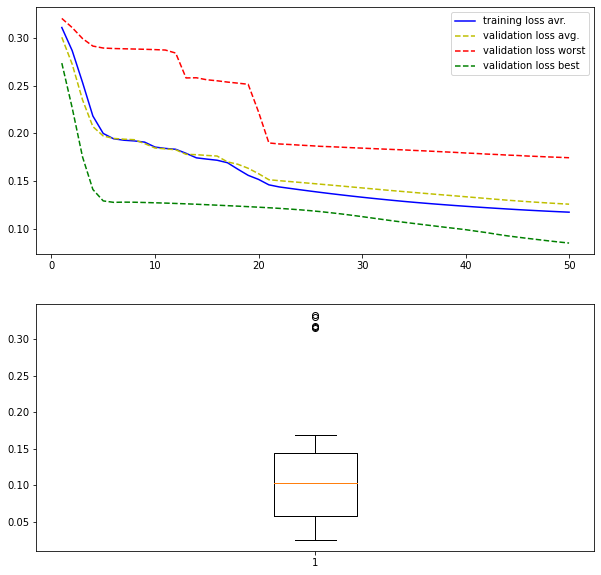

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 125.23522 sec
Last measures: [0.3167852461338043, 0.1363711953163147, 0.33294734358787537, 0.04763597249984741, 0.28739866614341736, 0.25974589586257935, 0.3188619017601013, 0.3324397802352905, 0.06335501372814178, 0.07876945286989212, 0.333333283662796, 0.29374539852142334, 0.3333333134651184, 0.05039568245410919, 0.10068435966968536, 0.333333283662796, 0.3195910155773163, 0.0358915813267231, 0.05996798351407051, 0.28523048758506775, 0.3305889964103699, 0.2936530113220215, 0.33194631338119507, 0.05817527323961258, 0.287901371717453, 0.10329091548919678, 0.15121036767959595, 0.016910474747419357, 0.0561351552605629, 0.09998787939548492]
Loss history average: [0.31212884 0.29588354 0.2757554  0.25449298 0.24361336 0.24056335
 0.23936623 0.23820993 0.23691981 0.2355038  0.23398663 0.23237422
 0.23070314 0.22901025 0.22741762 0.22593919 0.22459857 0.22339019
 0.22231333 0.22133322 0.22045153 0.21962963 0.21886072 0.21813403
 0.21745983 0.21684049 0.

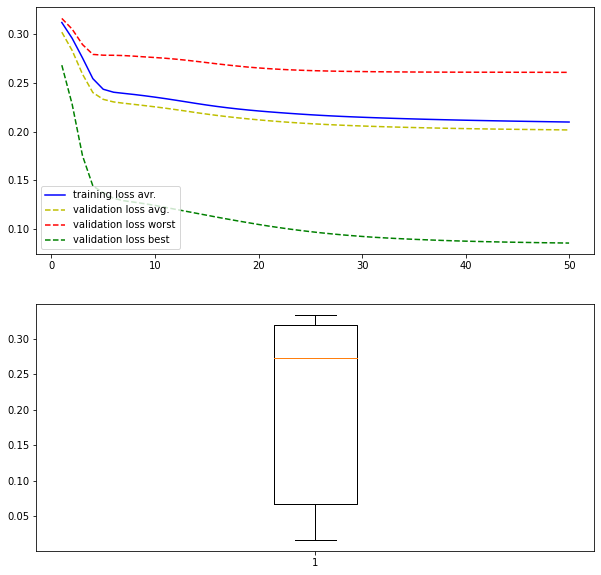

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 139.74574 sec
Last measures: [0.333333283662796, 0.11936118453741074, 0.03176405653357506, 0.055365175008773804, 0.08210693299770355, 0.1180884838104248, 0.11805757135152817, 0.026926124468445778, 0.06149601936340332, 0.11422628164291382, 0.19157551229000092, 0.11323116719722748, 0.02208089269697666, 0.05614248663187027, 0.0781792402267456, 0.1162128746509552, 0.3333333134651184, 0.018987948074936867, 0.04829207807779312, 0.10758192092180252, 0.11362630128860474, 0.12417538464069366, 0.03512172773480415, 0.05748453363776207, 0.3333333134651184, 0.16240321099758148, 0.1383526474237442, 0.029084686189889908, 0.3333333134651184, 0.07440336793661118]
Loss history average: [0.31307672 0.29102386 0.25643323 0.22047701 0.19623414 0.17971274
 0.17086639 0.15653818 0.15154721 0.15061845 0.1498584  0.14906585
 0.14822289 0.14733892 0.14641187 0.14543703 0.14442453 0.14337306
 0.14226976 0.14110226 0.13989293 0.13866979 0.1374393  0.13618344
 0.13489531 0.1

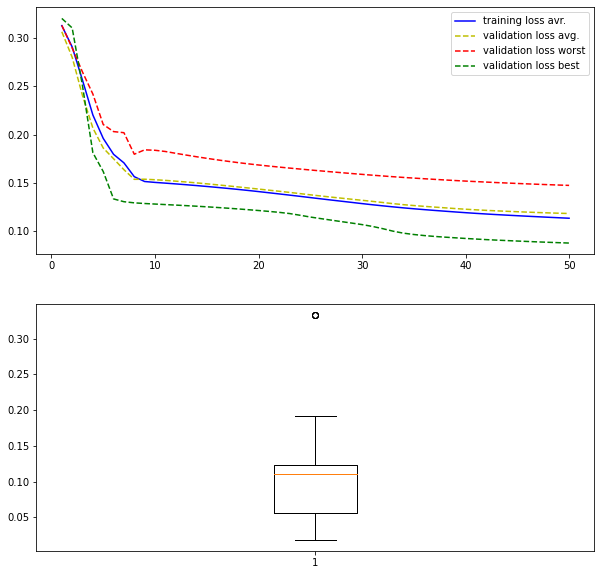

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 115.85564 sec
Last measures: [0.18723595142364502, 0.31889206171035767, 0.020134329795837402, 0.3163085877895355, 0.3007279634475708, 0.17107455432415009, 0.13350601494312286, 0.015454381704330444, 0.05321868881583214, 0.28838562965393066, 0.16389614343643188, 0.33022698760032654, 0.01840207539498806, 0.05235694721341133, 0.1156357079744339, 0.12236101925373077, 0.12605831027030945, 0.014280714094638824, 0.3308091163635254, 0.05996564403176308, 0.17507529258728027, 0.31958678364753723, 0.3333333134651184, 0.055042289197444916, 0.08411813527345657, 0.10607129335403442, 0.3333333134651184, 0.022858578711748123, 0.3333333134651184, 0.29556286334991455]
Loss history average: [0.30266335 0.28093294 0.25247585 0.22208355 0.20780848 0.2039237
 0.20166484 0.19930232 0.19729087 0.19531711 0.19312569 0.19085177
 0.18852803 0.18628708 0.18417418 0.18223814 0.18049626 0.17892384
 0.17751205 0.17624005 0.17510084 0.17408236 0.17317934 0.17236865
 0.17164847 0

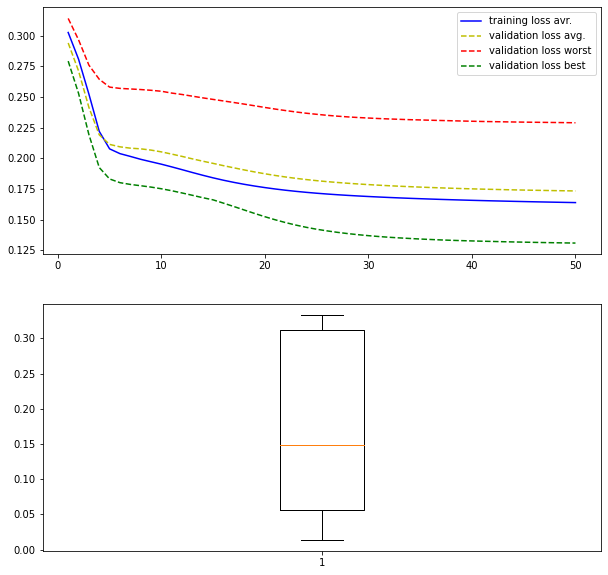

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 140.08771 sec
Last measures: [0.2587922513484955, 0.13388888537883759, 0.026757286861538887, 0.06108037009835243, 0.09267333894968033, 0.1125655546784401, 0.10761266201734543, 0.3333333134651184, 0.05933238938450813, 0.10479897260665894, 0.17030292749404907, 0.2823191285133362, 0.03544386103749275, 0.053930092602968216, 0.3333333134651184, 0.14241525530815125, 0.10684791207313538, 0.035079225897789, 0.32462814450263977, 0.10862147808074951, 0.14054512977600098, 0.11338172107934952, 0.3333333134651184, 0.3333333134651184, 0.11407557874917984, 0.16198565065860748, 0.13824021816253662, 0.3333333134651184, 0.32060885429382324, 0.11244649440050125]
Loss history average: [0.30907863 0.28719965 0.25275992 0.22160713 0.20806301 0.19982071
 0.19655133 0.19577894 0.19179273 0.18949081 0.18889641 0.18832073
 0.18762989 0.18696269 0.18624923 0.1854687  0.18462743 0.18364495
 0.17807249 0.17553671 0.17416821 0.17295584 0.17180655 0.17064527
 0.1694962  0.1683

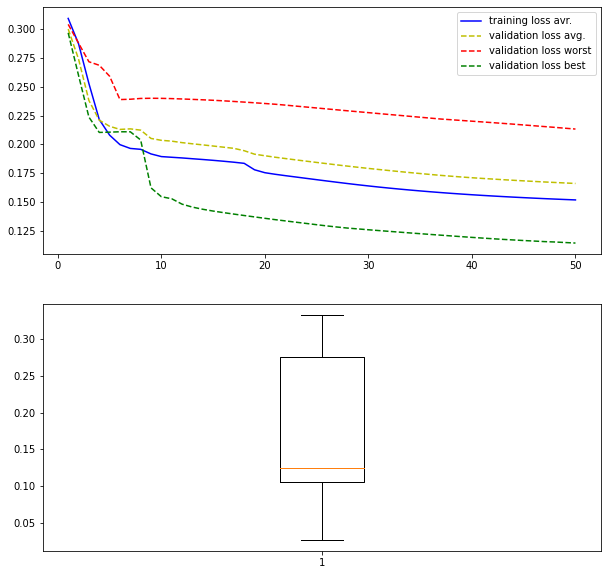

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(5)

Average elapsed k-fold validation time: 119.17166 sec
Last measures: [0.263175368309021, 0.2907354235649109, 0.01534916739910841, 0.06110753118991852, 0.12940867245197296, 0.2547270655632019, 0.31859123706817627, 0.03213090822100639, 0.32199016213417053, 0.3333333134651184, 0.18685047328472137, 0.1578901708126068, 0.016620589420199394, 0.05042227357625961, 0.0768306702375412, 0.31687888503074646, 0.2934906482696533, 0.017847072333097458, 0.3275347650051117, 0.3030839264392853, 0.18404415249824524, 0.10388535261154175, 0.018634982407093048, 0.31623250246047974, 0.13216345012187958, 0.18541626632213593, 0.2934902310371399, 0.33293500542640686, 0.06720763444900513, 0.05959419533610344]
Loss history average: [0.31164647 0.29163571 0.26450795 0.2361977  0.22539686 0.22188525
 0.21942797 0.21685686 0.2143886  0.21208316 0.20969091 0.20726507
 0.20494299 0.20275497 0.20076724 0.19901162 0.19747005 0.19610646
 0.1949029  0.19382121 0.19285213 0.19196523 0.19114335 0.19037816
 0.18967122 0.1889

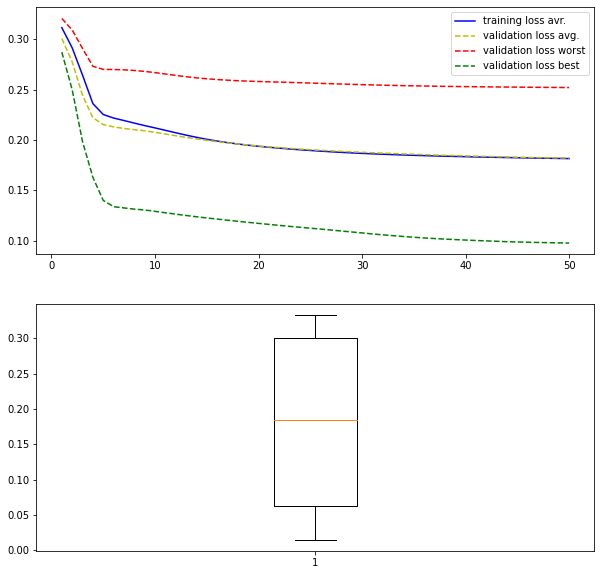

In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(5)

Average elapsed k-fold validation time: 142.31019 sec
Last measures: [0.2572358250617981, 0.13274838030338287, 0.03158983588218689, 0.055302612483501434, 0.11194700002670288, 0.1838928610086441, 0.27837029099464417, 0.03490834683179855, 0.06536668539047241, 0.11377349495887756, 0.18007509410381317, 0.1279500424861908, 0.3333333134651184, 0.050671741366386414, 0.28666943311691284, 0.1800774782896042, 0.14953573048114777, 0.028484299778938293, 0.32311755418777466, 0.11311880499124527, 0.13717053830623627, 0.12025763839483261, 0.04185154289007187, 0.05468793585896492, 0.11613316833972931, 0.333333283662796, 0.15195685625076294, 0.3334026336669922, 0.3266066014766693, 0.1108790785074234]
Loss history average: [0.30626923 0.28253685 0.24862658 0.21282059 0.19020497 0.18259469
 0.18056184 0.17947986 0.17851061 0.177537   0.17654444 0.17551639
 0.17445445 0.17335799 0.17224548 0.17114145 0.17005046 0.1689965
 0.16796635 0.1668982  0.16579654 0.16476149 0.16377544 0.16282223
 0.16193597 0.1610

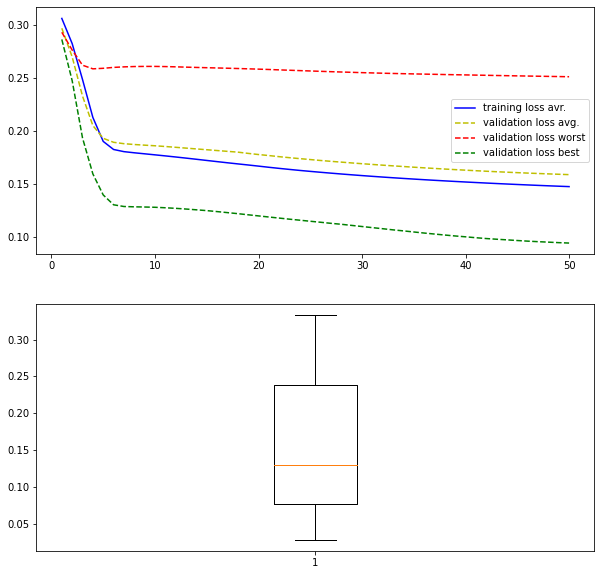

In [16]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)